# Natural Language Processing Project

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 
We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

In [2]:
yelp=pd.read_csv('yelp.csv')

In [3]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp['text length']=yelp['text'].apply(len)

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

In [8]:
import seaborn as sns

array([<AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>], dtype=object)

<Figure size 1080x720 with 0 Axes>

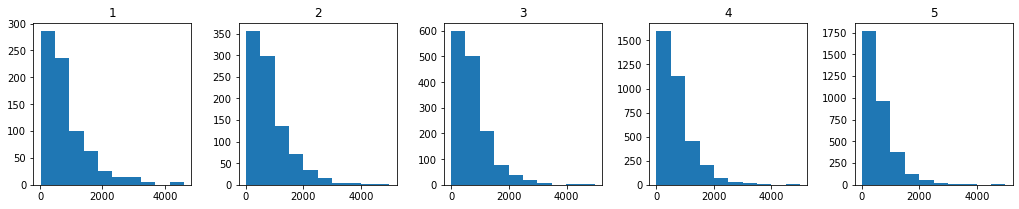

In [9]:
plt.figure(figsize=(15,10))
yelp.hist(column='text length',by='stars',figsize=(17,3),layout=(1,5),xrot=0)

**boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

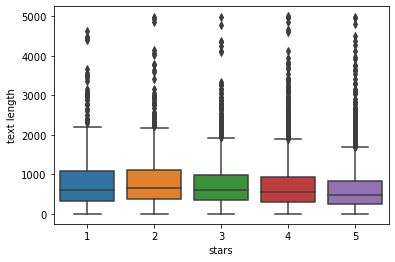

In [10]:
sns.boxplot(data=yelp,x='stars',y='text length')

**countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

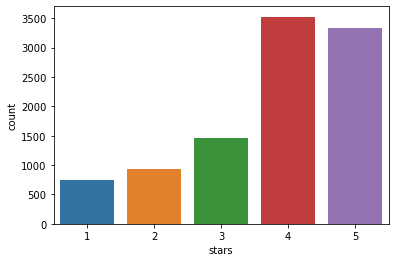

In [11]:
sns.countplot(data=yelp,x='stars')

In [12]:
yelp_grp_by=yelp.groupby('stars').mean()

In [13]:
yelp_grp_by.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Heatmap of above Dataframe**

<AxesSubplot:>

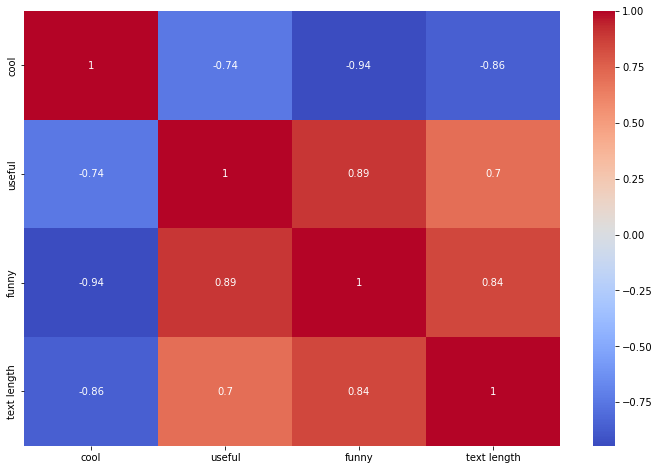

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(yelp_grp_by.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

In [15]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [16]:
X=yelp_class['text']
y=yelp_class['stars']

**Creation of a CountVectorizer object.**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [18]:
X=cv.fit_transform(X)

In [19]:
print(X)

  (0, 11265)	2
  (0, 18735)	1
  (0, 17406)	1
  (0, 10635)	1
  (0, 8161)	2
  (0, 11821)	3
  (0, 1984)	1
  (0, 6864)	1
  (0, 2364)	1
  (0, 937)	8
  (0, 9114)	9
  (0, 18517)	8
  (0, 6123)	3
  (0, 17126)	10
  (0, 18585)	1
  (0, 12505)	1
  (0, 18672)	1
  (0, 10300)	2
  (0, 15422)	1
  (0, 12016)	1
  (0, 12054)	1
  (0, 17134)	4
  (0, 7715)	1
  (0, 921)	1
  (0, 407)	1
  :	:
  (4085, 9817)	1
  (4085, 10088)	1
  (4085, 9127)	1
  (4085, 10873)	1
  (4085, 2154)	1
  (4085, 183)	1
  (4085, 10907)	1
  (4085, 17416)	1
  (4085, 6370)	1
  (4085, 3314)	1
  (4085, 3329)	1
  (4085, 14423)	1
  (4085, 1442)	1
  (4085, 16134)	1
  (4085, 15944)	1
  (4085, 6651)	1
  (4085, 12298)	1
  (4085, 543)	1
  (4085, 17700)	1
  (4085, 2515)	1
  (4085, 189)	1
  (4085, 9624)	1
  (4085, 5510)	1
  (4085, 836)	1
  (4085, 15962)	1


# First ML Model -- Decision Trees

**Train Test Split.**

In [20]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train_1,y_train_1)

DecisionTreeClassifier()

In [23]:
predictions = dtree.predict(X_test_1)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_1,predictions))
print(confusion_matrix(y_test_1,predictions))

              precision    recall  f1-score   support

           1       0.62      0.55      0.58       228
           5       0.90      0.92      0.91       998

    accuracy                           0.85      1226
   macro avg       0.76      0.74      0.75      1226
weighted avg       0.85      0.85      0.85      1226

[[126 102]
 [ 77 921]]


**Can we get a better Model ??**

# Second ML Model -- Support Vector Machines(SVC)

In [25]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
from sklearn.svm import SVC

In [27]:
svc=SVC()
svc.fit(X_train_2,y_train_2)

SVC()

In [28]:
pred=svc.predict(X_test_2)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_2,pred))
print(confusion_matrix(y_test_2,pred))

              precision    recall  f1-score   support

           1       0.98      0.36      0.53       228
           5       0.87      1.00      0.93       998

    accuracy                           0.88      1226
   macro avg       0.92      0.68      0.73      1226
weighted avg       0.89      0.88      0.86      1226

[[ 82 146]
 [  2 996]]


**Some more Refining of our Model**
# Using Text Processing

In [30]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [31]:
from sklearn.pipeline import Pipeline

**a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),SVC()**

In [32]:
pipeline=Pipeline([('count-vectorizer',CountVectorizer()),('tfidf',TfidfTransformer()),('svc',SVC())])

In [33]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [34]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('count-vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('svc', SVC())])

### Predictions and Evaluation


In [35]:
predictions = pipeline.predict(X_test)

In [36]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[134  94]
 [  6 992]]
              precision    recall  f1-score   support

           1       0.96      0.59      0.73       228
           5       0.91      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.94      0.79      0.84      1226
weighted avg       0.92      0.92      0.91      1226



In [37]:
# if we use the Decision Trees ML model , it produces an inferior result.